In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("dataset.csv")
df = shuffle(df)
df.head()

,age,ethnicity,gender,img_name,pixels
894,1,0,1,20170109191226882.jpg.chip.jpg,138 146 145 154 158 155 151 152 156 158 160 15...
18307,50,3,0,20170119202107229.jpg.chip.jpg,65 82 128 87 92 102 125 136 153 166 171 173 17...
13317,35,1,1,20170117154114285.jpg.chip.jpg,41 41 41 41 40 39 24 15 34 65 68 70 50 47 112 ...
12807,34,0,0,20170117132525481.jpg.chip.jpg,132 111 182 231 239 248 249 245 249 236 221 21...
20619,60,0,0,20170117001131850.jpg.chip.jpg,220 220 214 207 213 207 205 209 211 196 192 19...


In [3]:
num_pixels = len(df['pixels'][0].split(" "))
img_height = int(np.sqrt(len(df['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(df['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [4]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))
df.head()

,age,ethnicity,gender,img_name,pixels
894,1,0,1,20170109191226882.jpg.chip.jpg,"[138.0, 146.0, 145.0, 154.0, 158.0, 155.0, 151..."
18307,50,3,0,20170119202107229.jpg.chip.jpg,"[65.0, 82.0, 128.0, 87.0, 92.0, 102.0, 125.0, ..."
13317,35,1,1,20170117154114285.jpg.chip.jpg,"[41.0, 41.0, 41.0, 41.0, 40.0, 39.0, 24.0, 15...."
12807,34,0,0,20170117132525481.jpg.chip.jpg,"[132.0, 111.0, 182.0, 231.0, 239.0, 248.0, 249..."
20619,60,0,0,20170117001131850.jpg.chip.jpg,"[220.0, 220.0, 214.0, 207.0, 213.0, 207.0, 205..."


In [5]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


C:\Users\yasin\AppData\Local\Temp\ipykernel_22960\2060766175.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i+1)


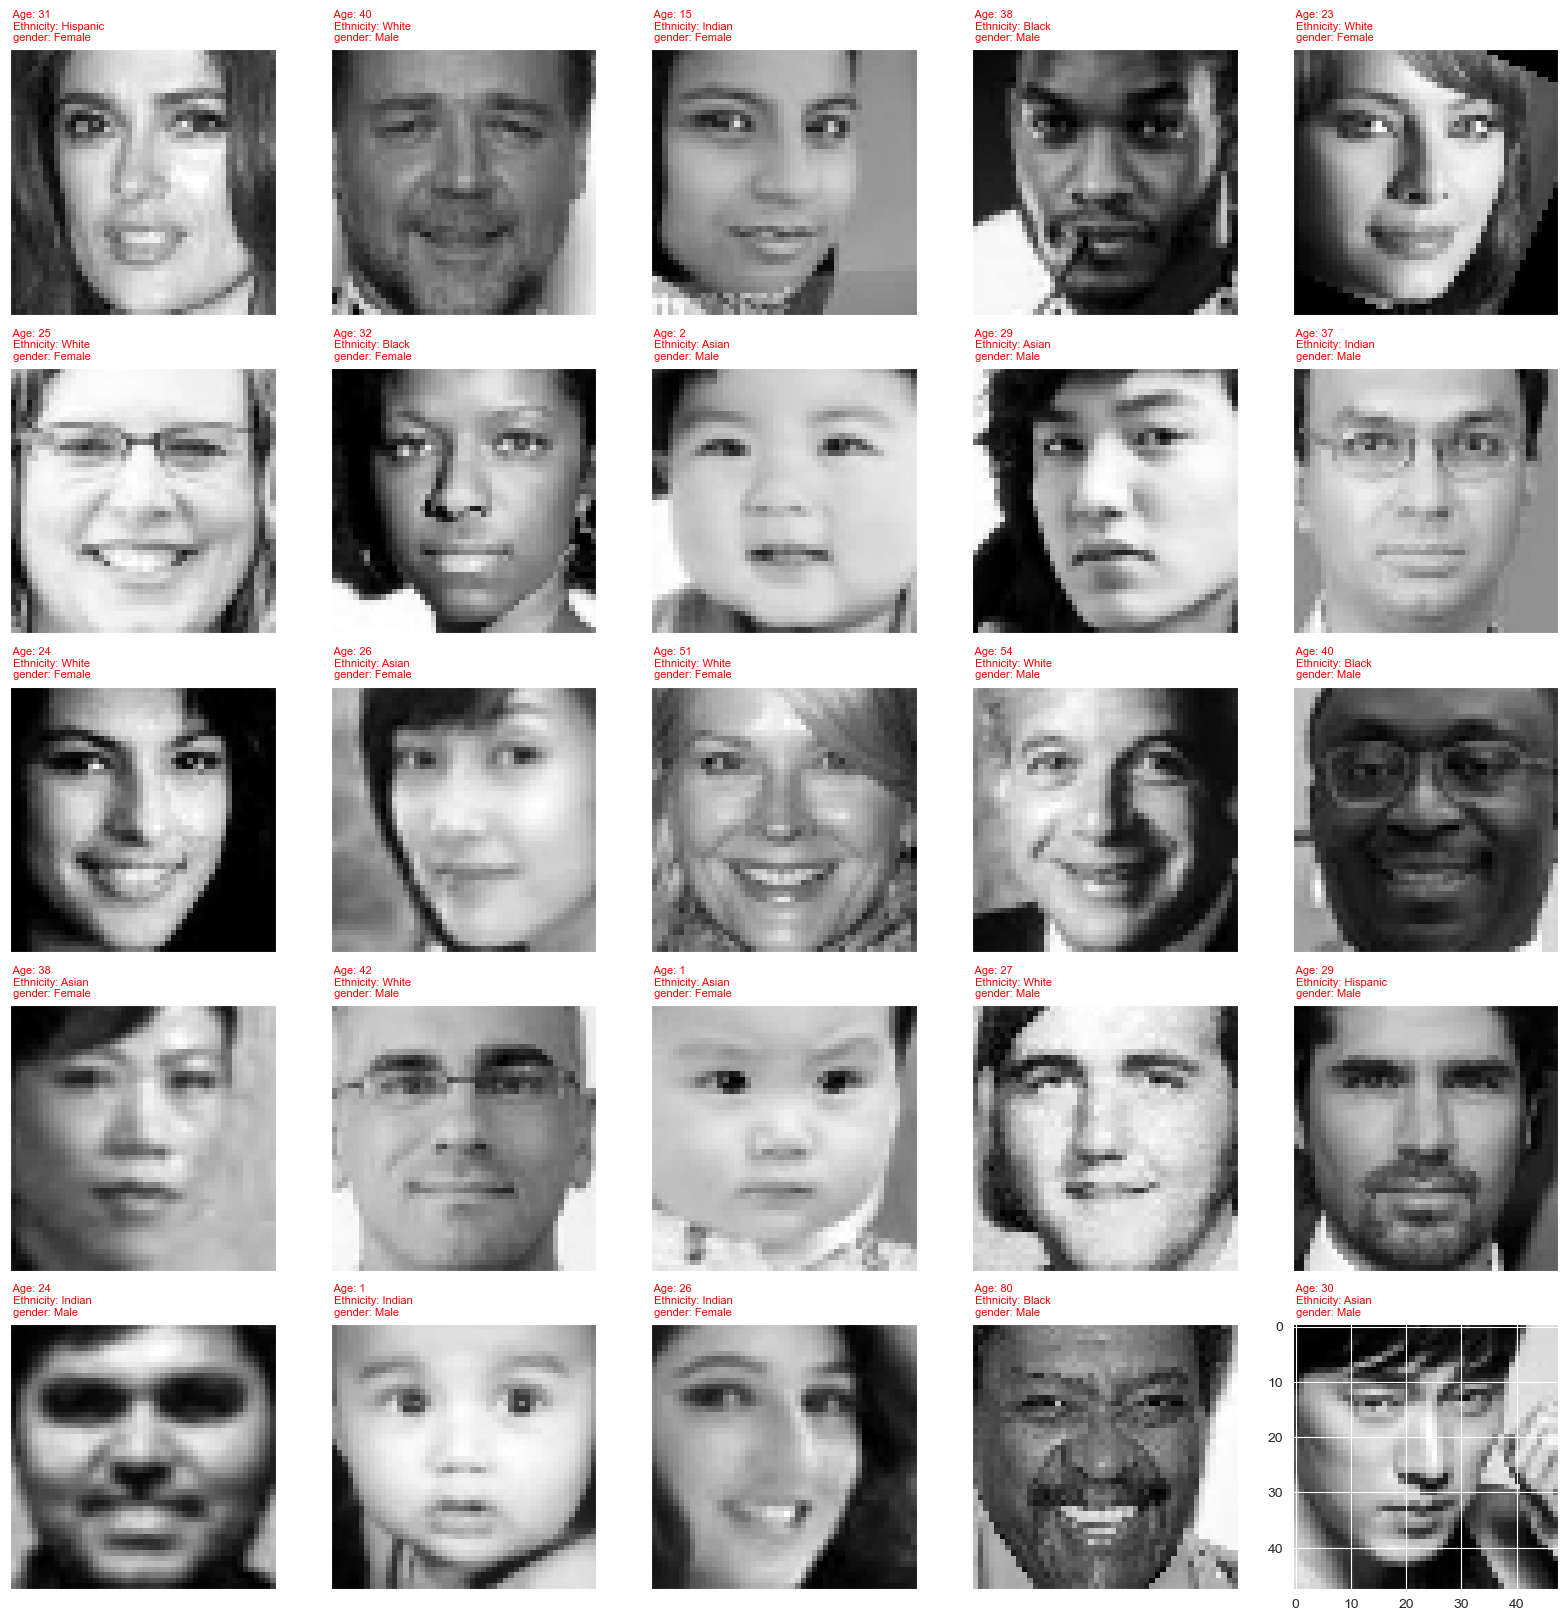

In [6]:
plt.figure(figsize=(20, 20))

for i in range(25):  
    index = np.random.randint(0, len(df))
    plt.xticks([])
    plt.yticks([])   
    plt.grid(False)
    plt.subplot(5, 5, i+1)
    plt.imshow(df['pixels'].iloc[index].reshape(48, 48),"gray")
    plt.title(' Age: {}\n Ethnicity: {}\n gender: {}'.format(df['age'].iloc[index], {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Hispanic"}[df['ethnicity'].iloc[index]], {0:"Male", 1:"Female"}[df['gender'].iloc[index]]),loc="left",color='red',fontsize = 8)

plt.show()

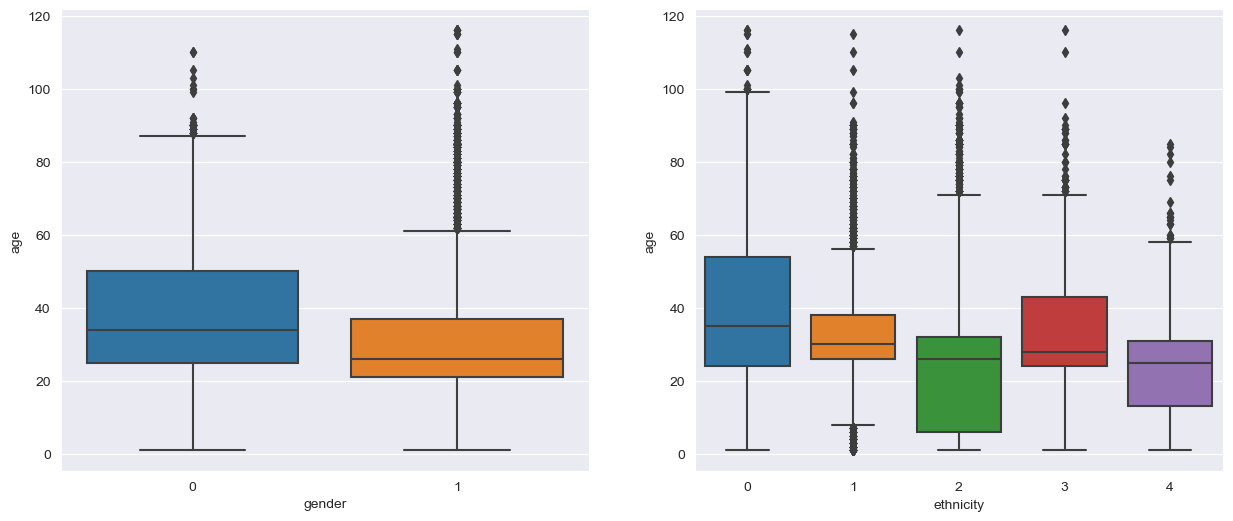

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
_ = sns.boxplot(data=df, x='gender', y='age', ax=ax1)
_ = sns.boxplot(data=df, x='ethnicity', y='age', ax=ax2)

<Axes: xlabel='gender', ylabel='age'>

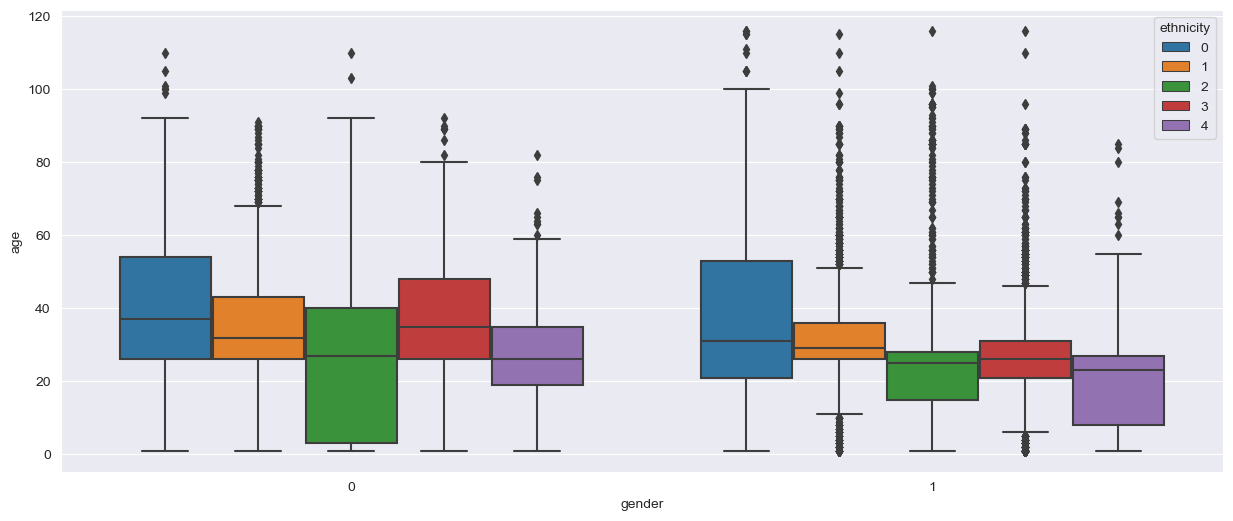

In [10]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='gender', y='age', hue='ethnicity')

<Axes: xlabel='ethnicity,gender'>

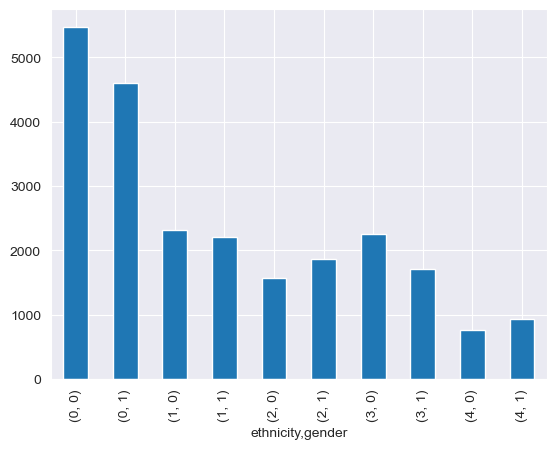

In [11]:
df.groupby(by=['ethnicity', 'gender'])['age'].count().plot(kind='bar')

<Axes: >

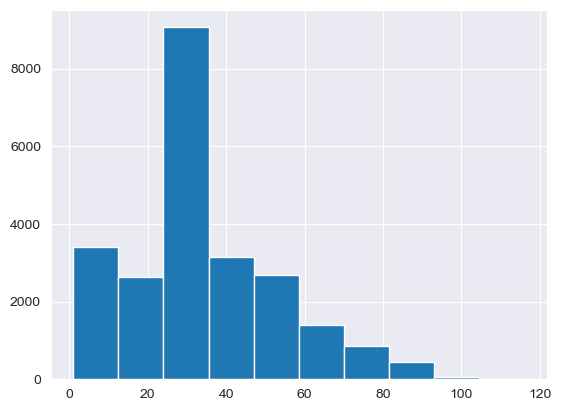

In [12]:
df['age'].hist()

In [13]:
df['age'].describe()

count    23705.000000
mean        33.300907
std         19.885708
min          1.000000
25%         23.000000
50%         29.000000
75%         45.000000
max        116.000000
Name: age, dtype: float64

In [16]:
df.isnull().values.any()

False

In [17]:
df.shape

(18529, 5)

In [15]:
df.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

C:\Users\yasin\AppData\Local\Temp\ipykernel_22960\271260352.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], color = 'cyan')


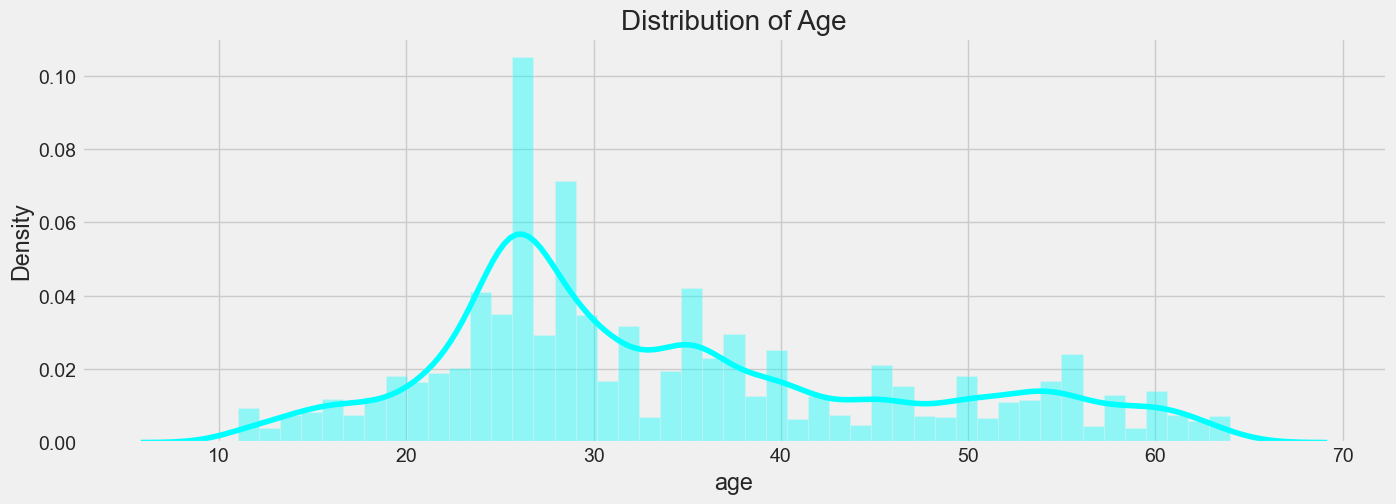

In [19]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

<Axes: >

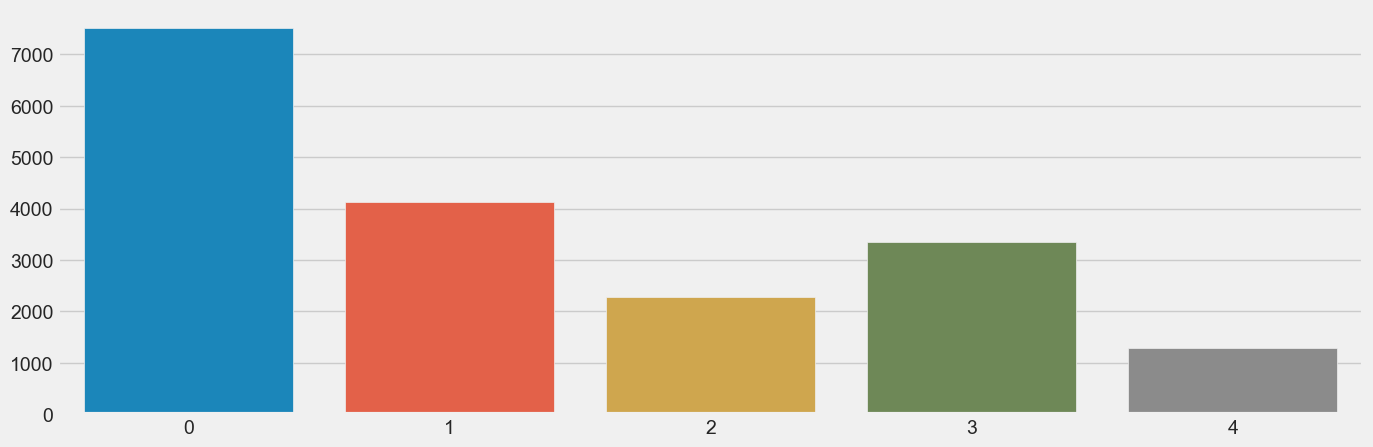

In [21]:
sns.barplot(y=list(df['ethnicity'].value_counts().values),x= list(df['ethnicity'].value_counts().index))